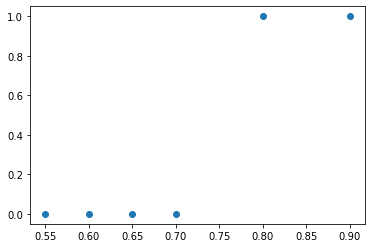

In [5]:
import numpy as np
a=[0.8,0.65,0.55,0.7,0.6,0.9]
b=[1,0,0,0,0,1]
np.corrcoef(a,b)
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(a,b)

In [2]:
#sigmoid函数，deriv=True时返回sigmoid倒数
def sigmoid(x,deriv=False):
    if deriv == False:
        return 1/(1+np.exp(-x))
    return x*(1-x)

In [5]:
x = np.array([
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [0,0,1],
    [0,0,1]
])
x.shape

(5, 3)

In [6]:
y = np.array([[0],[1],[1],[0],[0]])

In [16]:
np.random.seed(1)
w0 = 2*np.random.random((3,4))-1
w1 = 2*np.random.random((4,1))-1
print(w0)
print(w1)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]


In [18]:
for i in range(60000):
    L0 = x
    L1 = sigmoid(np.dot(L0,w0))
    L2 = sigmoid(np.dot(L1,w1))
    
    L2_error = y - L2
    if i%1000 == 0:
        print("Error："+str(np.mean(np.abs(L2_error))))
    L2_delta = L2_error*sigmoid(L2,deriv=True)
    L1_error = L2_delta.dot(w1.T)
    L1_delta = L1_error*sigmoid(L1,deriv=True)
    
    w1 += L1.T.dot(L2_delta)
    w0 += L0.T.dot(L1_delta)
    

Error：0.008588728817491143
Error：0.007916324137027673
Error：0.0073781073372569585
Error：0.006934852103512043
Error：0.0065616802163077454
Error：0.0062419575897897745
Error：0.005964088599248493
Error：0.0057197119827728845
Error：0.005502627658742349
Error：0.005308128623493821
Error：0.005132568900682724
Error：0.004973074966147708
Error：0.004827347569787771
Error：0.004693522306620016
Error：0.004570069416375985
Error：0.004455720408688812
Error：0.004349413424328137
Error：0.004250251931995309
Error：0.004157473079433217
Error：0.004070423141964466
Error：0.003988538262062448
Error：0.0039113291838630306
Error：0.003838369039424681
Error：0.003769283491386411
Error：0.0037037427132295604
Error：0.0036414548157709865
Error：0.003582160421609607
Error：0.003525628158018143
Error：0.00347165089011834
Error：0.003420042554883649
Error：0.0033706354859597484
Error：0.0033232781418909263
Error：0.0032778331678150452
Error：0.0032341757343120605
Error：0.0031921921077830316
Error：0.0031517784151828855
Error：0.00311283

In [20]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

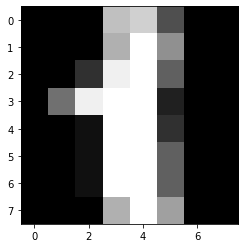

In [23]:
digits = load_digits()
plt.imshow(digits.images[1], cmap="gray")
plt.show()

In [24]:
X = digits.data
T = digits.target
print(X)
print(T)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [26]:
V = np.random.random([64,100])*2-1
W = np.random.random([100,10])*2-1


In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,T)

In [29]:
labels_train = LabelBinarizer().fit_transform(Y_train)

In [32]:
def predict(x):
    L1 = sigmoid(np.dot(x,V))
    L2 = sigmoid(np.dot(L1,W))
    return L2

In [35]:
def train(X,T,steps=10000,lr=0.11):
    global V,W
    for n in range(steps+1):
        i = np.random.randint(X.shape[0])
        x= X[i]
        x = np.atleast_2d(x)
        L1 = sigmoid(np.dot(x,V))
        L2 = sigmoid(np.dot(L1,W))
        
        L2_delta = (T[i] - L2)*sigmoid(L2,True)
        L1_delta = L2_delta.dot(W.T)*sigmoid(L1,True)
        
        W += lr*L1.T.dot(L2_delta)
        V += lr*x.T.dot(L1_delta)
        
        if n%1000 ==0:
            output = predict(X_test)
            pre = np.argmax(output,axis=1)
            acc = np.mean(np.equal(pre,Y_test))
            print("iter："+str(n+1)+"acc："+str(acc))
            

In [36]:
train(X_train,labels_train,30000)

iter：1acc：0.08888888888888889
iter：1001acc：0.5022222222222222
iter：2001acc：0.7644444444444445
iter：3001acc：0.8977777777777778
iter：4001acc：0.9155555555555556
iter：5001acc：0.88
iter：6001acc：0.9288888888888889
iter：7001acc：0.92
iter：8001acc：0.9244444444444444
iter：9001acc：0.9444444444444444
iter：10001acc：0.9288888888888889
iter：11001acc：0.9422222222222222
iter：12001acc：0.9488888888888889
iter：13001acc：0.9511111111111111
iter：14001acc：0.9533333333333334
iter：15001acc：0.9622222222222222
iter：16001acc：0.9511111111111111
iter：17001acc：0.9644444444444444
iter：18001acc：0.9533333333333334
iter：19001acc：0.9533333333333334
iter：20001acc：0.9666666666666667
iter：21001acc：0.9733333333333334
iter：22001acc：0.9644444444444444
iter：23001acc：0.9688888888888889
iter：24001acc：0.9666666666666667
iter：25001acc：0.9666666666666667
iter：26001acc：0.9644444444444444
iter：27001acc：0.9733333333333334
iter：28001acc：0.9733333333333334
iter：29001acc：0.9666666666666667
iter：30001acc：0.9711111111111111


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')


def count_na(_data):
    print(_data.isna().sum())


def load_data(_base_path):
    train_data1 = pd.read_csv(base_path + 'train_set.csv')
    train_label_data = pd.read_csv(base_path + 'train_label.csv')
    submit_data = pd.read_csv(base_path + 'result_predict_A.csv')
    _label = train_label_data['label']
    _total_data = pd.concat([train_data1, submit_data], ignore_index=True)
    return _total_data, _label


def processing_data(_data):
    _data['X1'] = (_data['X1'] == '女士').astype('int')
    _data['X38'].fillna(0, inplace=True)  # 未产生5G流量
    cat_na_cols = ['X3', 'X5', 'X24', 'X25', 'X27', 'X26', 'X28', 'X29', 'X30', 'X31', 'X37', 'X38', 'X40', 'X41', 'X42', 'X43']
    num_na_cols = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
                   'X21', 'X22', 'X23', 'X32', 'X33', 'X34', 'X35', 'X36']
    for col in cat_na_cols:
        _data[col].fillna(_data[col].mode()[0], inplace=True)
    for col in num_na_cols:
        _data[col].fillna(_data[col].median(), inplace=True)
    
    return _data


if __name__ == '__main__':
    base_path = "E:/python/data/训练赛/5G用户预测/"
    total_data, label = load_data(base_path)
    total_data = processing_data(total_data)
    print(total_data['X3'].mode())
    total_data['X3'][total_data['X3'].isna()] = total_data['X3'].mode()
    count_na(total_data)

0    3.0
dtype: float64
user_id       0
product_no    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
dtype: int64
